In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, time):
    cv2.imshow("frame: ", img)
    cv2.waitKey(time)
    cv2.destroyAllWindows()



In [6]:
#unsharp masking
img = cv2.imread('./images/batman.png')
blur = cv2.GaussianBlur(img, (5,5), 0)
mask = img - blur
sharp = np.add(img, mask)
sharp = np.clip(sharp, 0, 255).astype(np.uint8)

r = np.concatenate([img, sharp], axis=1 )
show(r, 2000)

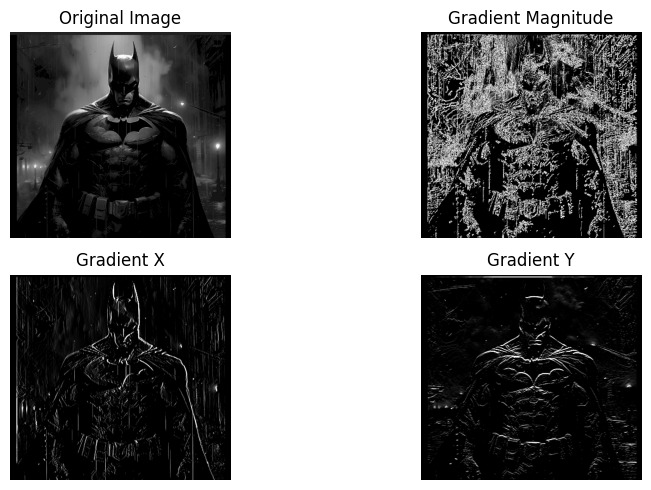

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image and convert it to grayscale
image = cv2.imread('./images/batman.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Define Sobel Kernels for x and y directions
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

# Step 3: Convolve the image with Sobel kernels to get gradients
gradient_x = cv2.filter2D(image, ddepth=-1, kernel=sobel_x)  # Gradient in x-direction
gradient_y = cv2.filter2D(image, ddepth=-1, kernel=sobel_y)  # Gradient in y-direction

# Step 4: Calculate gradient magnitude
gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
gradient_magnitude = np.uint8(np.clip(gradient_magnitude, 0, 255))  # Clip values to valid range

# Step 5: Calculate gradient direction (optional)
gradient_direction = np.arctan2(gradient_y, gradient_x)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(gradient_magnitude, cmap='gray')
axs[0, 1].set_title('Gradient Magnitude')
axs[0, 1].axis('off')

axs[1, 0].imshow(gradient_x, cmap='gray')
axs[1, 0].set_title('Gradient X')
axs[1, 0].axis('off')

axs[1, 1].imshow(gradient_y, cmap='gray')
axs[1, 1].set_title('Gradient Y')
axs[1, 1].axis('off')

cv2.waitKey(0)  

plt.tight_layout()
plt.show()
# Display the results
# cv2.imshow('Original Image', image)
# cv2.imshow('Gradient Magnitude', gradient_magnitude)
# cv2.imshow('Gradient X', gradient_x)
# cv2.imshow('Gradient Y', gradient_y)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
#canny opencv
img = cv2.imread('./images/batman.png', 0)
blurred = cv2.GaussianBlur(img, (5,5), 0)
edges = cv2.Canny(blurred, 50, 150)

x = np.concatenate([img, edges], axis = 1)
show(x, 2000)

In [24]:
#laplacian
img = cv2.imread('./images/batman.png')

kern = np.array([[0,-1,0], [-1, 4,-1], [0,-1,0]])
lapl = cv2.filter2D(img, ddepth = -1, kernel = kern)

kern2 = np.array([[0,1,0], [1, -4,1], [0,1,0]])
inv_lapl = cv2.filter2D(img, ddepth = -1, kernel = kern2)

x = np.concatenate([img, lapl, inv_lapl], axis = 1)


show(x, 2000)